# Data Classification

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt, numpy as np, scipy.stats, scipy.signal, pandas as pd

from numpy import genfromtxt
from sklearn import svm
from sklearn.model_selection import train_test_split

## Loading and visualising the sample data

In [115]:
dataset = []

In [124]:
dataset_sample = genfromtxt('new_datasets/plastic_3.csv', delimiter=',')

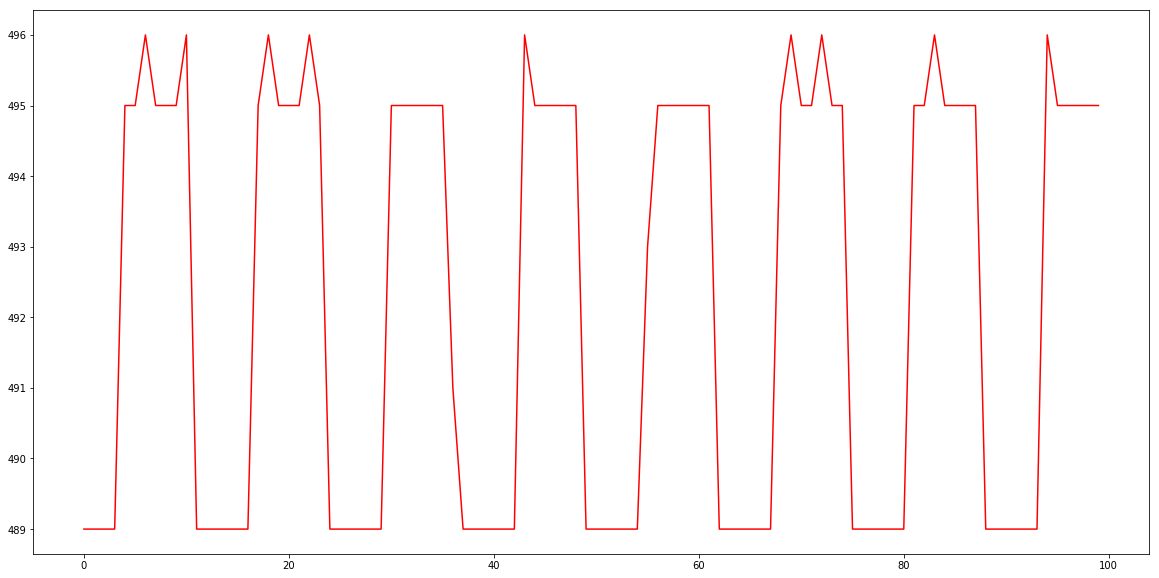

In [125]:
plt.figure(figsize=(20,10))

for i in range(4,5):
    plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

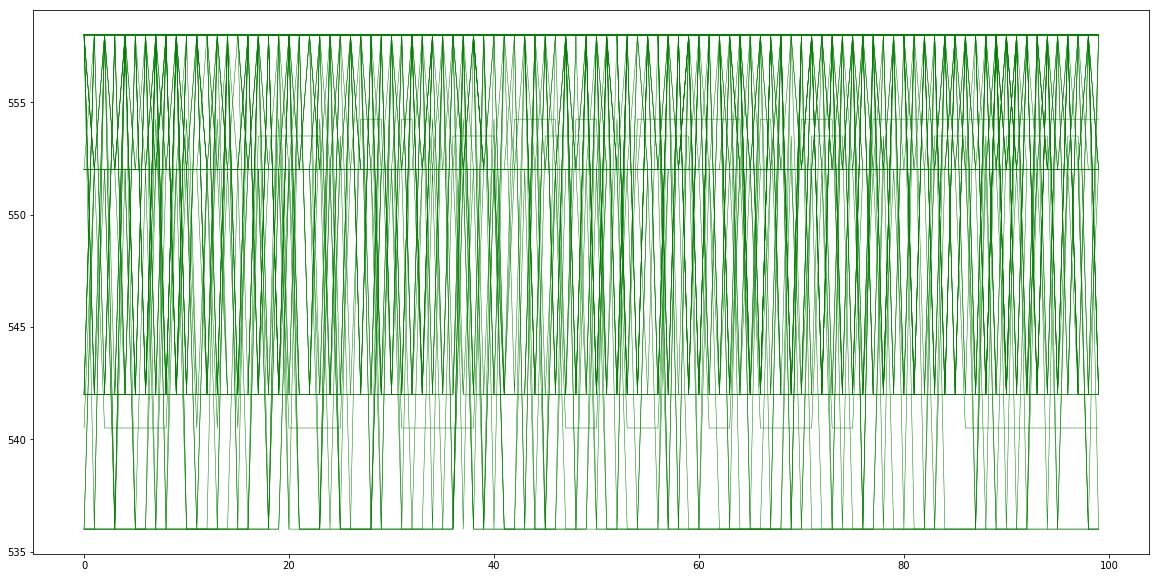

In [126]:
plt.figure(figsize=(20,10))
for i in range(0, 50):
    dataset.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
for i in range(0, 50):
    plt.plot(new_list[i],'g', linewidth=0.5)
#     plt.plot(dataset_sample[i],'r', linewidth=1.5)
plt.show()

In [127]:
len(dataset)

150

In [128]:
import csv
with open("plastic_consolidated.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(dataset)

## Loading the datasets

Each of the dataset contain a total of 10,000 points in the form of 100x100 format. All the different datapoints have been collected with the apparatus being kept at a distance of 8cm from the object.

In [143]:
#dataset_ceramic = genfromtxt('new_datasets/ceramic.csv', delimiter=',')
#dataset_wood = genfromtxt('new_datasets/ceramic_2.csv', delimiter=',')
#dataset_cardboard = genfromtxt('new_datasets/cardboard.csv', delimiter=',')
dataset_plastic = genfromtxt('plastic_consolidated.csv', delimiter=',')
dataset_ceremic = genfromtxt('ceremics_consolidated.csv', delimiter=',')
dataset_wood = genfromtxt('wood_consolidated.csv', delimiter=',')

## Plotting the pulse values

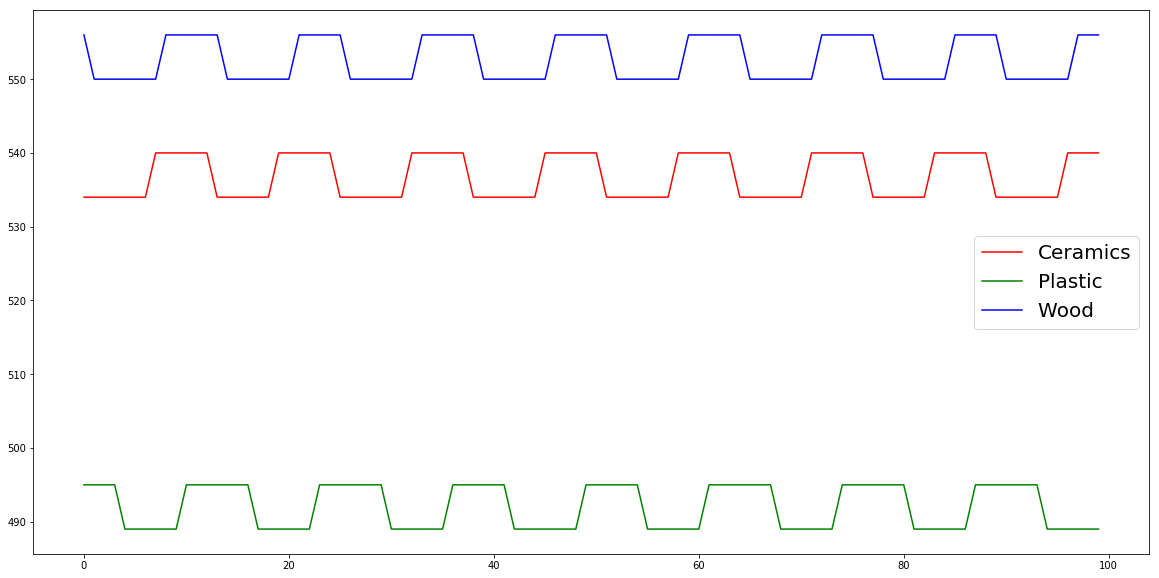

In [226]:
plt.figure(figsize=(20,10))

for i in range(1,2):
    plt.plot(dataset_ceremic[i],'r',label='Ceramics', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g',label='Plastic', linewidth=1.5)
    plt.plot(dataset_wood[i],'b',label='Wood', linewidth=1.5)
plt.legend(loc='best',prop={'size': 20})
plt.show()

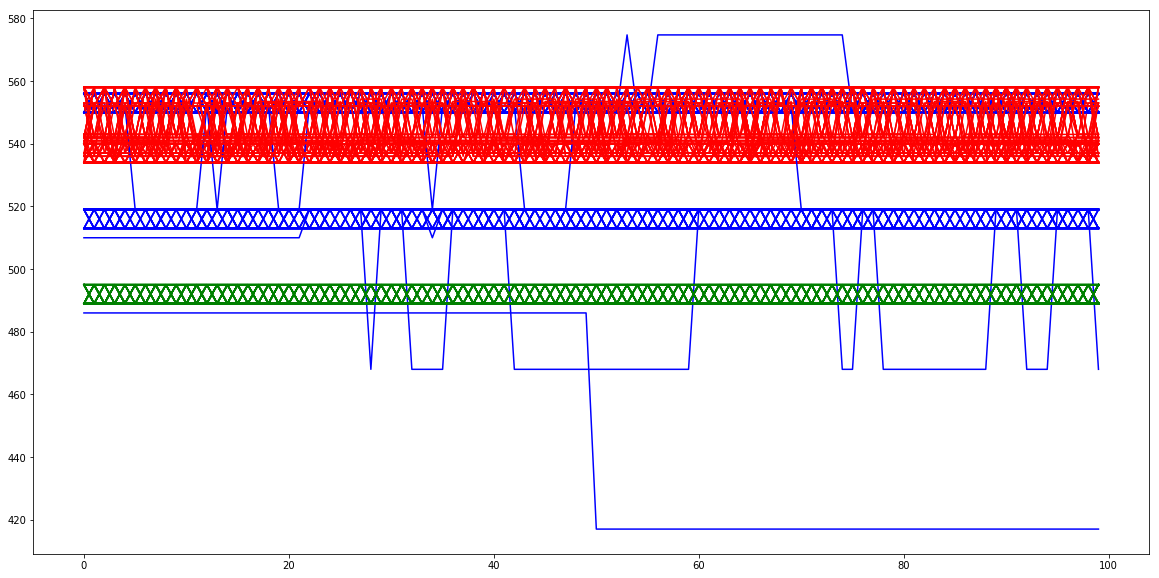

In [227]:
plt.figure(figsize=(20,10))

for i in range(0,150):
    plt.plot(dataset_ceremic[i],'r', linewidth=1.5)
    plt.plot(dataset_plastic[i],'g', linewidth=1.5)
    plt.plot(dataset_wood[i],'b', linewidth=1.5)
plt.show()

## Initialise a class ListTable

In [172]:
class ListTable(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
analysis_condition = ListTable()

analysis_condition.append(['Min', 'Max', 'Range', '75%','25%','Median', 'Mean', 'STD', 'Var','Kurtosis','skewness'])

In [177]:
#temp_data = [dataset_ceramic, dataset_wood][1]
#temp_data = [new_list, new_list1,new_list_test][2]
temp_data = [dataset_ceremic,dataset_plastic,dataset_wood][2]
for i in range(0,150):
    print(np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),np.std(temp_data[i]),
          np.var(temp_data[i]),scipy.stats.kurtosis(temp_data[i]),
          scipy.stats.skew(temp_data[i]))

550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.959595959595971 0.2010075630517968
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.941558441558437 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507899
550.0 556.0 6.0 556.0 550.0 550.0 552.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.64 2.9783216750378054 8.8704 -1.9415584415584373 0.24174688920762782
550.0 556.0 6.0 556.0 550.0 550.0 552.7 2.9849623113198596 8.909999999999998 -1.9595959595959713 0.20100

513.0 519.0 6.0 519.0 513.0 513.0 515.94 2.9993999399879967 8.9964 -1.9983993597439005 0.04000800240074573
513.0 519.0 6.0 519.0 513.0 513.0 515.88 2.9975990392312313 8.9856 -1.993589743589743 0.08006407690254816
513.0 519.0 6.0 519.0 513.0 513.0 515.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507903
513.0 519.0 6.0 519.0 513.0 513.0 515.76 2.9903845906505073 8.942400000000001 -1.9742351046698858 0.16051447078103465
513.0 519.0 6.0 519.0 513.0 516.0 516.0 3.0 9.0 -2.0 0.0
513.0 519.0 6.0 519.0 513.0 513.0 515.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507899
513.0 519.0 6.0 519.0 513.0 513.0 515.94 2.9993999399879967 8.9964 -1.9983993597439005 0.04000800240074572
513.0 519.0 6.0 519.0 513.0 513.0 515.82 2.9945951312322667 8.967599999999997 -1.9855479727017338 0.12021658495507903
513.0 519.0 6.0 519.0 513.0 513.0 515.88 2.9975990392312313 8.9856 -1.993589743589743 0.08006407690254815
513.0 519.0 6.0 519.0 513.0 513.0 515.94 2.99

In [178]:
for i in range(0,150):
    analysis_condition.append([np.amin(temp_data[i]),np.amax(temp_data[i]),np.ptp(temp_data[i]),
      np.percentile(temp_data[i],75),np.percentile(temp_data[i],25),
          np.median(temp_data[i]),np.mean(temp_data[i]),round(np.std(temp_data[i]),2),
          round(np.var(temp_data[i]),2),round(scipy.stats.kurtosis(temp_data[i]),2),
          round(scipy.stats.skew(temp_data[i]),2)])
    
analysis_condition

Min,Max,Range,75%,25%,Median,Mean,STD,Var,Kurtosis,skewness
534.0,541.0,7.0,541.0,541.0,541.0,540.44,1.9,3.61,7.59,-3.1
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08
534.0,540.0,6.0,540.0,534.0,534.0,536.82,2.99,8.97,-1.99,0.12
534.0,540.0,6.0,540.0,534.0,534.0,536.7,2.98,8.91,-1.96,0.2
534.0,540.0,6.0,540.0,534.0,534.0,536.76,2.99,8.94,-1.97,0.16
534.0,540.0,6.0,540.0,534.0,534.0,536.88,3.0,8.99,-1.99,0.08


## Plotting the statistics associated with a single pulse value

In [251]:
def statistics_plot(single_plot_value):
    plot_analysis = [np.amin(single_plot_value), np.amax(single_plot_value),
                     np.ptp(single_plot_value), np.percentile(single_plot_value, 75),
                     np.percentile(single_plot_value, 25), np.median(single_plot_value),
                     np.mean(single_plot_value), round(np.std(single_plot_value),2),
                     round(np.var(single_plot_value),2), round(scipy.stats.kurtosis(single_plot_value),2),
                     round(scipy.stats.skew(single_plot_value),2)]

    plt.figure(figsize=(20,10))
    datapoints = np.linspace(0,100)

    plt.plot(single_plot_value, linewidth=1.8)

    plt.plot(datapoints, np.array([plot_analysis[0] for i in range(len(datapoints))]), 'r--', label = 'Min - '+str(plot_analysis[0]))
    plt.plot(datapoints, np.array([plot_analysis[1] for i in range(len(datapoints))]), 'b--', label = 'Max - '+str(plot_analysis[1]))

    plt.plot(datapoints, np.array([plot_analysis[5] for i in range(len(datapoints))]), 'g--', label = 'Median - '+str(plot_analysis[5]))
    plt.plot(datapoints, np.array([plot_analysis[6] for i in range(len(datapoints))]), 'y--', label = 'Mean - '+str(plot_analysis[6]))

    plt.legend(loc = 2, prop={'size': 20})

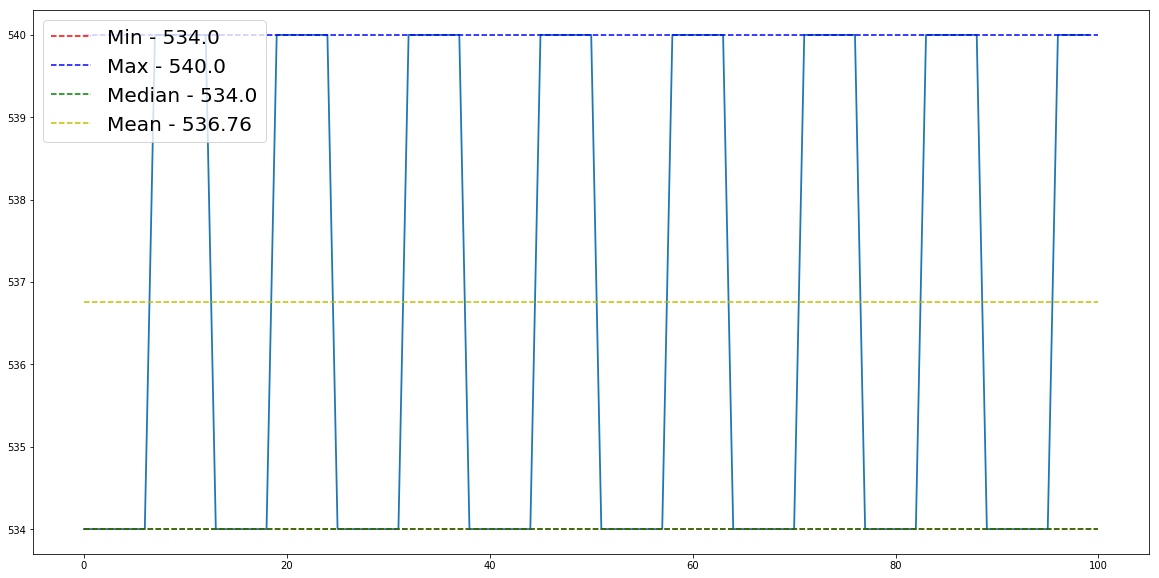

In [258]:
statistics_plot(dataset_ceremic[1])

## Getting ready with dataset

In [180]:
x_train = analysis_condition[1:]
df = pd.DataFrame(x_train)
#df = df.drop([2,7,8,9,10], axis=1)

### Correlation of dataframe

In [181]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.981420,0.008652,0.981265,0.999250,0.978231,0.993545,-0.011477,-0.145172,-0.036202,0.060440
1,0.981420,1.000000,0.200357,0.998688,0.980463,0.989115,0.995420,0.179651,0.027420,-0.034241,0.043829
2,0.008652,0.200357,1.000000,0.194309,0.007497,0.159908,0.114575,0.994869,0.884165,0.006403,-0.080193
3,0.981265,0.998688,0.194309,1.000000,0.980346,0.989563,0.995511,0.176302,0.025533,-0.046703,0.025969
4,0.999250,0.980463,0.007497,0.980346,1.000000,0.978407,0.993169,-0.014243,-0.145840,-0.032528,0.043708
5,0.978231,0.989115,0.159908,0.989563,0.978407,1.000000,0.992652,0.138122,-0.025071,-0.040205,-0.021243
6,0.993545,0.995420,0.114575,0.995511,0.993169,0.992652,1.000000,0.093873,-0.052523,-0.039573,0.024926
7,-0.011477,0.179651,0.994869,0.176302,-0.014243,0.138122,0.093873,1.000000,0.902920,-0.048879,-0.095768
8,-0.145172,0.027420,0.884165,0.025533,-0.145840,-0.025071,-0.052523,0.902920,1.000000,-0.009589,-0.041389
9,-0.036202,-0.034241,0.006403,-0.046703,-0.032528,-0.040205,-0.039573,-0.048879,-0.009589,1.000000,0.687921


### Making a dataframe

In [182]:
x_train_array = df.as_matrix()
len(x_train_array)

450

### Labelling the data

In [183]:
y_train_array = []
for i in range(0,150):
    y_train_array.append('Ceremic')
for i in range(150,300):   
    y_train_array.append('Plastic')
for i in range(300,450):   
    y_train_array.append('Wood')
    
x_train_array = np.array(x_train_array)
print(x_train_array.shape)

x_train_array = x_train_array.reshape(x_train_array.shape[0],11)
print(x_train_array.shape)

(450, 11)
(450, 11)


## Testing out the Machine Learning algorithm

### Test-train split

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x_train_array, y_train_array, test_size=0.33)
clf = svm.SVC(probability=True)

### Initialising Machine Learning algorithm

In [185]:
clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Confidence values of each class

In [186]:
clf.predict_proba(x_train_array)

array([[0.96420448, 0.01126637, 0.02452915],
       [0.9643393 , 0.01122317, 0.02443753],
       [0.96420025, 0.01125379, 0.02454596],
       ...,
       [0.00646538, 0.00700286, 0.98653176],
       [0.00642457, 0.00698893, 0.98658651],
       [0.00642656, 0.00698959, 0.98658385]])

### Prediction of the test datapoints

In [187]:
clf.predict(x_train_array)

array(['Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic',
       'Ceremic', 'Ceremic', 'Ceremic', 'Ceremic', 

### Score of the classifier

In [188]:
clf.score(x_train_array, y_train_array) * 100

98.66666666666667

## Working with the filtered dataset

### Loading the filtered dataset

In [56]:
for i in range(0, 50):
    new_list1 = [np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]]
print(new_list1)

[558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0, 558.0, 558.0, 558.0, 558.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 552.0, 558.0, 558.0]


### Plotting the filtered dataset

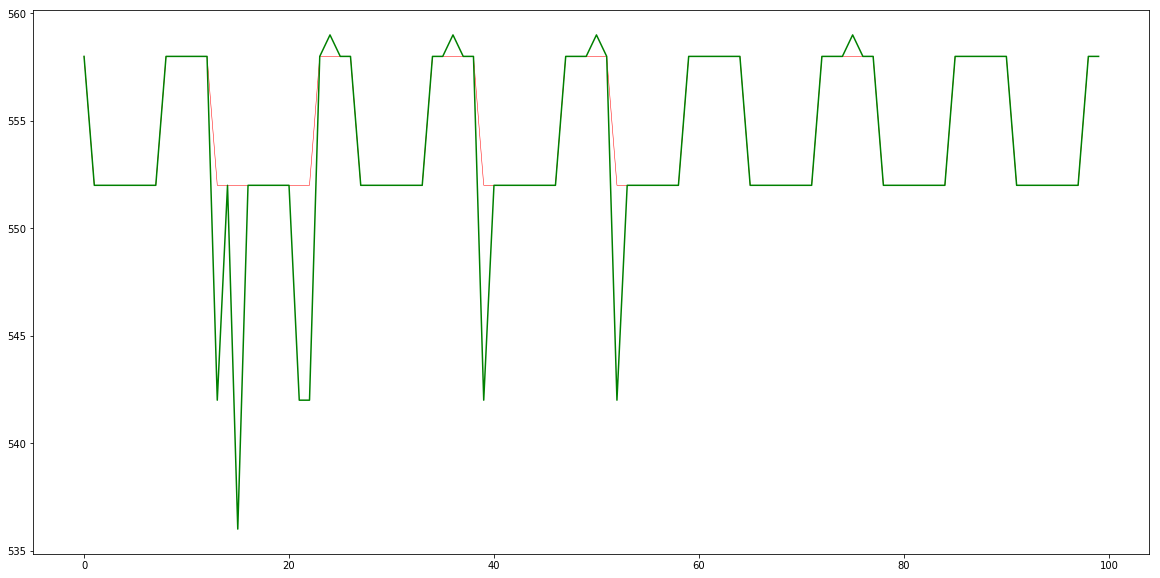

In [57]:
plt.figure(figsize=(20,10))

plt.plot(new_list1,'r', linewidth=0.5)
plt.plot(dataset_ceramic[49],'g', linewidth=1.5)
plt.show()

In [110]:
new_list = []
new_list1 = []
for i in range(0, 50):
    new_list.append([np.percentile(dataset_wood[i], 75) if val > np.mean(dataset_wood[i]) else np.percentile(dataset_wood[i], 25) for val in dataset_wood[i]])
    new_list1.append([np.percentile(dataset_ceramic[i], 75) if val > np.mean(dataset_ceramic[i]) else np.percentile(dataset_ceramic[i], 25) for val in dataset_ceramic[i]])

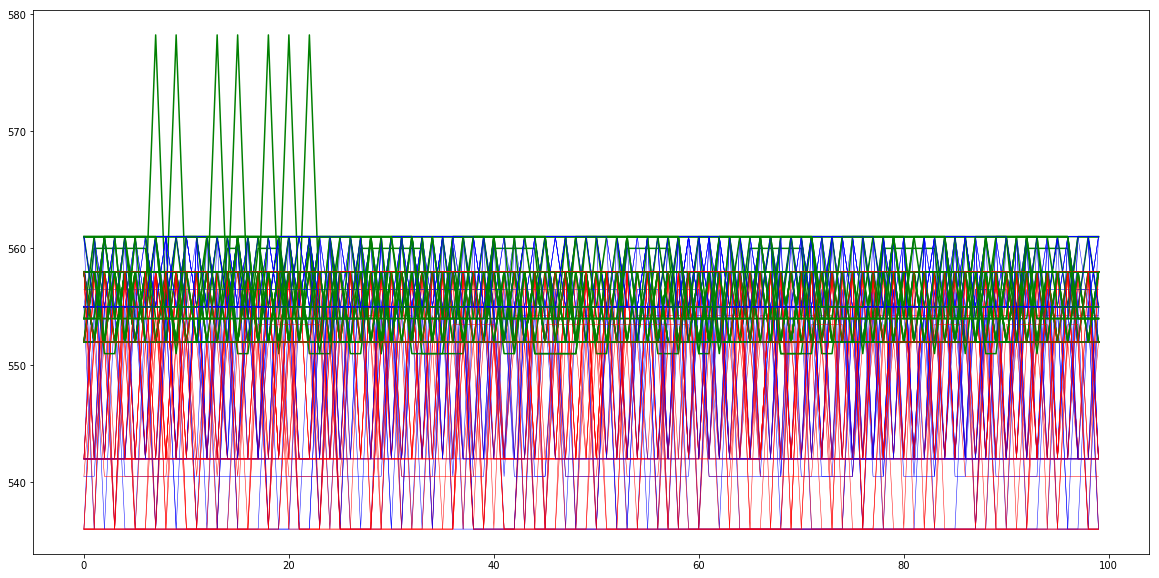

In [149]:
plt.figure(figsize=(20,10))
for i in range(0,50):
    plt.plot(new_list[i],'b', linewidth=0.5)
    plt.plot(new_list1[i],'r', linewidth=0.5)
    plt.plot(new_list_test[i],'g', linewidth=1.5)
plt.show()

### Plotting the datapoints of a single pulse

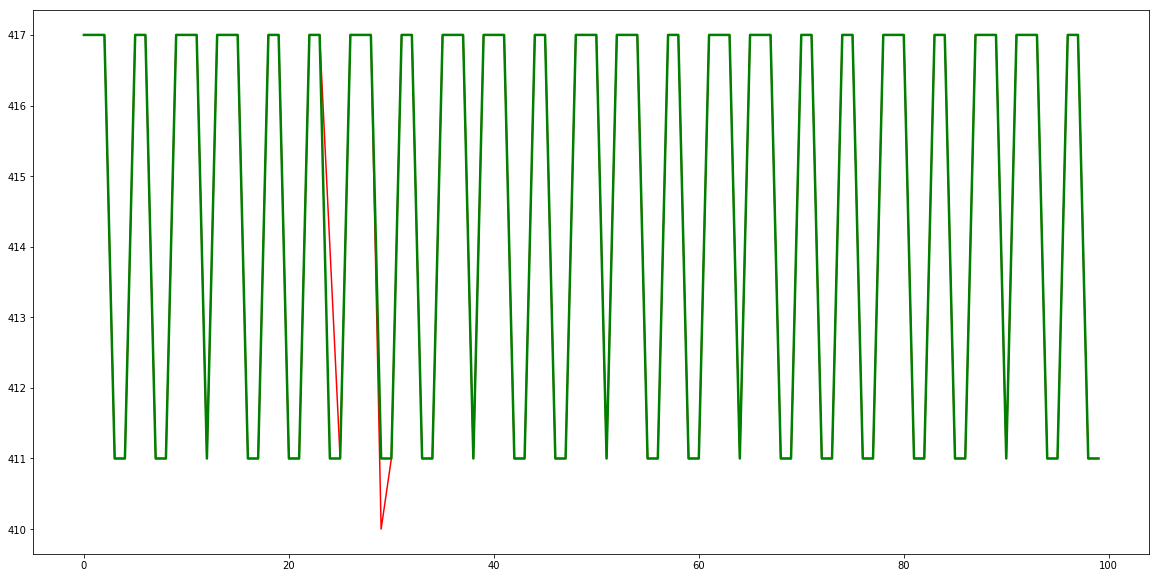

In [38]:
plt.figure(figsize=(20,10))

for i in range(0,1):
    plt.plot(dataset_ceramic_8cm[i],'r', linewidth=1.5)
    plt.plot(filter_dataset_ceramic_8cm[i],'g', linewidth=2.5)
plt.show()

In [152]:
new_list_test = []
y_test = []
for i in range(0, 50):
    new_list_test.append([np.percentile(dataset_sample[i], 75) if val > np.mean(dataset_sample[i]) else np.percentile(dataset_sample[i], 25) for val in dataset_sample[i]])
    y_test.append('Ceramic')

In [134]:
clf.predict(new_list_test)

ValueError: X.shape[1] = 100 should be equal to 6, the number of features at training time

### For the poster

In [217]:
class ListTablePrediction(list):
    def _repr_html_(self):
        html = ["<table width=100%>"]
        row_count = 0
        
        for row in self:
            row_count = row_count + 1
            
            if(row_count == 1):
                html.append("<tr>")
                
                for col in row:
                    html.append("<th align = 'center'>{0}</th>".format(col))
                
                html.append("</tr>")
            
            else:
                html.append("<tr>")
                col_count = 0
                
                for col in row:
                    if(col_count == 0):
                        html.append("<th align = 'center'>{0}</th>".format(col))
                    else:
                        html.append("<td>{0}</td>".format(col))
                        
                    col_count = col_count + 1
                html.append("</tr>")
        
        html.append("</table>")
        return ''.join(html)
    
analysis_condition = ListTablePrediction()
analysis_condition.append(['', 'Prediction Table Matrix', ''])
analysis_condition.append(['Ceramics', 'Plastic', 'Wood'])
analysis_condition

,Prediction Table Matrix,
Ceramics,Plastic,Wood


In [218]:
predicted_array = clf.predict_proba(x_train_array)[0]

In [219]:
analysis_condition.append([round(predicted_array[0],4), round(predicted_array[1],4),round(predicted_array[2],4)])

In [220]:
analysis_condition

,Prediction Table Matrix,
Ceramics,Plastic,Wood
0.9642,0.0113,0.0245
